1. Carga el fichero earthquakes.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
quakes = pd.read_csv("data/earthquakes.csv")
quakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


2. Crea un histograma para magType ml
Usa los siguientes parametros
a) density = True
b) cumulative = True

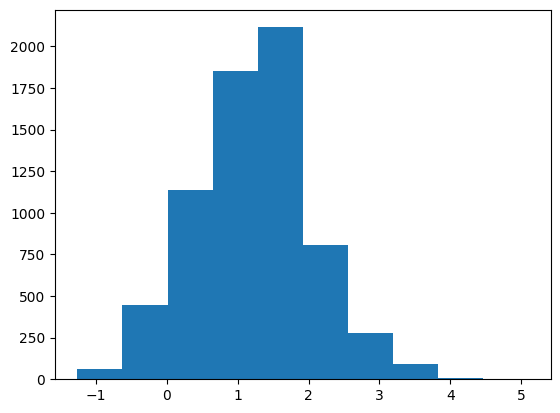

In [7]:
plt.hist(quakes[quakes["magType"]=="ml"]["mag"]);

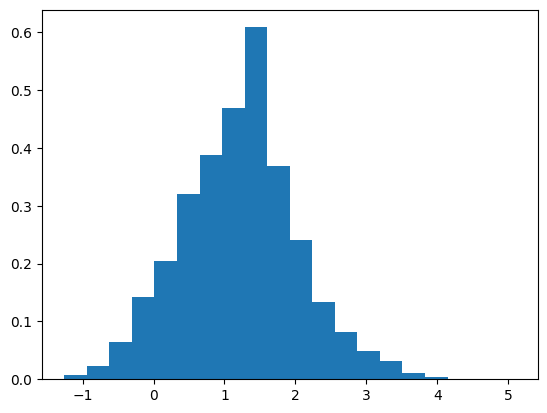

In [19]:
plt.hist(quakes[quakes["magType"]=="ml"]["mag"], density=True, bins=20);

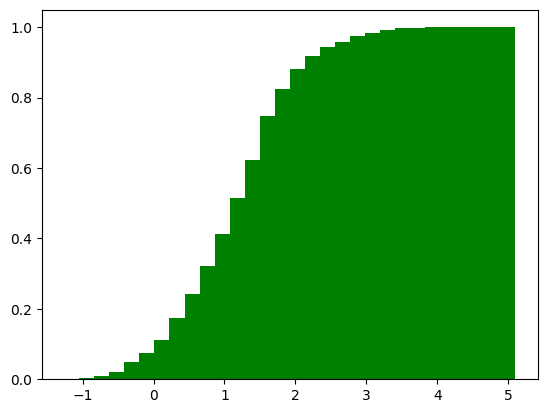

In [17]:
plt.hist(quakes[quakes["magType"]=="ml"]["mag"], density=True, cumulative=True, color="green", bins=30);

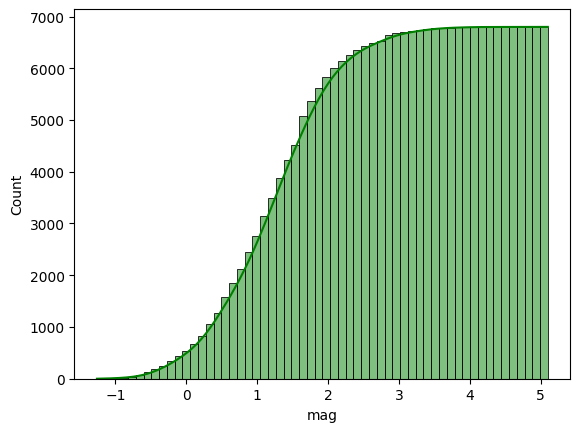

In [20]:
sns.histplot(quakes[quakes["magType"]=="ml"]["mag"], cumulative=True, color="green", kde=True);

In [22]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, *, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
    Compute and plot a histogram.

    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution ei

3. Modifica el título y ejes del gráfico

Text(0, 0.5, 'Número de terremotos')

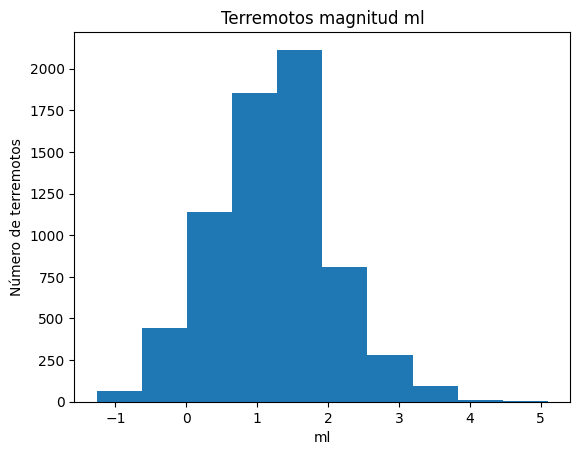

In [7]:
plt.hist(quakes[quakes["magType"]=="ml"]["mag"]);
plt.title("Terremotos magnitud ml")
plt.xlabel("ml")
plt.ylabel("Número de terremotos")

4. Grafica juntos magType ml y mb

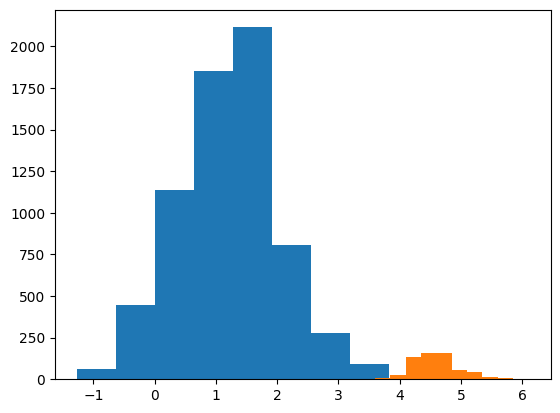

In [9]:
plt.hist(quakes[quakes["magType"]=="ml"]["mag"]);
plt.hist(quakes[quakes["magType"]=="mb"]["mag"]);

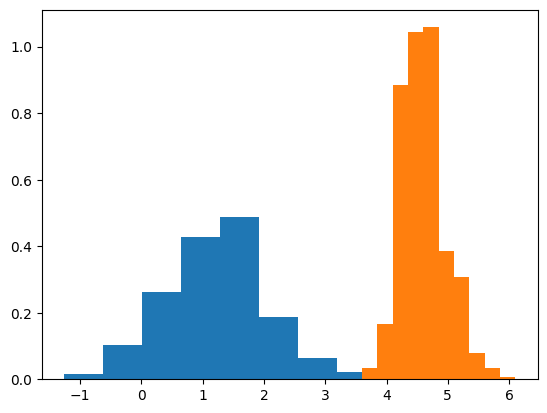

In [10]:
plt.hist(quakes[quakes["magType"]=="ml"]["mag"], density=True);
plt.hist(quakes[quakes["magType"]=="mb"]["mag"],density=True);

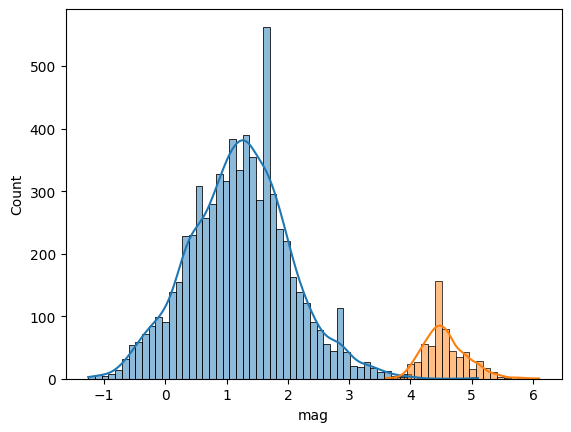

In [11]:
sns.histplot(quakes[quakes["magType"]=="ml"]["mag"], kde=True);
sns.histplot(quakes[quakes["magType"]=="mb"]["mag"],kde=True);

5. Añade lineas de la media y la mediana

(0.0, 2500.0)

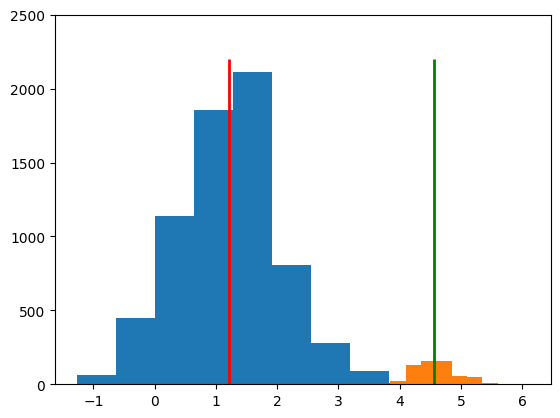

In [32]:
plt.hist(quakes[quakes["magType"]=="ml"]["mag"]);
plt.hist(quakes[quakes["magType"]=="mb"]["mag"]);
plt.vlines(quakes[quakes["magType"]=="ml"]["mag"].mean(), 0,2200, color="r", lw=2)
plt.vlines(quakes[quakes["magType"]=="mb"]["mag"].mean(), 0,2200, color="g", lw=2)
plt.ylim(0, 2500)

6. Grafica los terremotos de tipo magnitud mb por fecha

In [38]:
quakes["fecha"] = pd.to_datetime(quakes["time"]*1000*1000)

In [43]:
quakes["hora"] = quakes["fecha"].dt.time

In [45]:
quakes_mb = quakes[quakes["magType"]=="mb"]

(array([17791., 17795., 17799., 17803., 17805., 17809., 17813., 17817.]),
 [Text(17791.0, 0, '2018-09-17'),
  Text(17795.0, 0, '2018-09-21'),
  Text(17799.0, 0, '2018-09-25'),
  Text(17803.0, 0, '2018-09-29'),
  Text(17805.0, 0, '2018-10-01'),
  Text(17809.0, 0, '2018-10-05'),
  Text(17813.0, 0, '2018-10-09'),
  Text(17817.0, 0, '2018-10-13')])

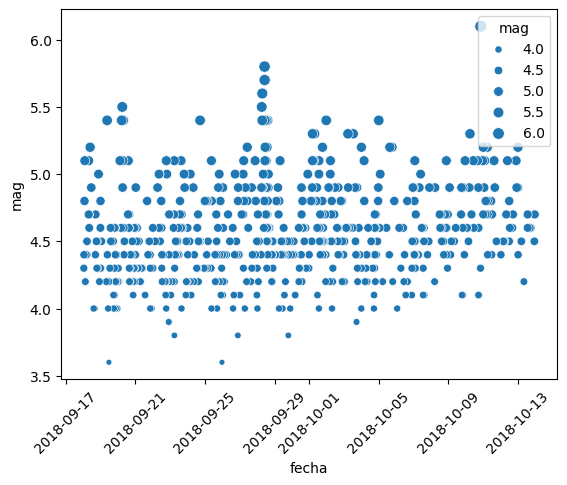

In [59]:
sns.scatterplot(x=quakes_mb["fecha"], y=quakes_mb["mag"], size=quakes_mb["mag"])
plt.xticks(rotation=45)


7. Incluye en un único daframe las cotizaciones de los faang

In [64]:
faang = pd.read_csv("faang.csv")
faang.head()
faang["date"] = pd.to_datetime(faang["date"])

In [70]:
faang["ticker"].unique()

array(['aapl', 'amzn', 'fb', 'goog', 'nflx'], dtype=object)

(array([17532., 17591., 17652., 17713., 17775., 17836., 17897.]),
 [Text(17532.0, 0, '2018-01'),
  Text(17591.0, 0, '2018-03'),
  Text(17652.0, 0, '2018-05'),
  Text(17713.0, 0, '2018-07'),
  Text(17775.0, 0, '2018-09'),
  Text(17836.0, 0, '2018-11'),
  Text(17897.0, 0, '2019-01')])

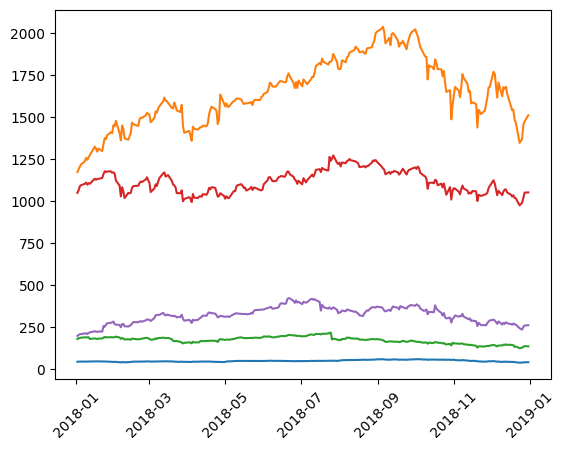

In [75]:
plt.plot(faang[faang["ticker"]=="aapl"]["date"], faang[faang["ticker"]=="aapl"]["open"])
plt.plot(faang[faang["ticker"]=="amzn"]["date"], faang[faang["ticker"]=="amzn"]["open"])
plt.plot(faang[faang["ticker"]=="fb"]["date"], faang[faang["ticker"]=="fb"]["open"])
plt.plot(faang[faang["ticker"]=="goog"]["date"], faang[faang["ticker"]=="goog"]["open"])
plt.plot(faang[faang["ticker"]=="nflx"]["date"], faang[faang["ticker"]=="nflx"]["open"])
plt.xticks(rotation=45)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


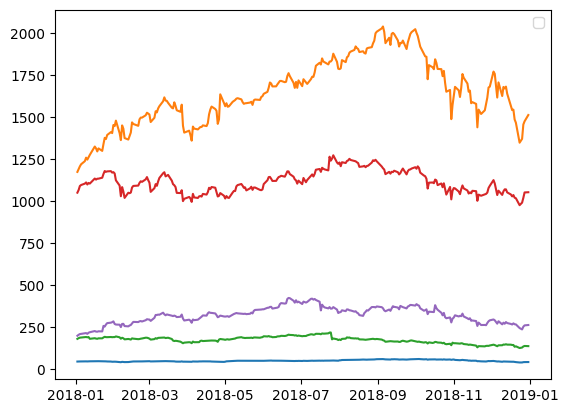

In [78]:
for f in faang["ticker"].unique():
    plt.plot(faang[faang["ticker"]==f]["date"], faang[faang["ticker"]==f]["open"])

<Axes: xlabel='date', ylabel='open'>

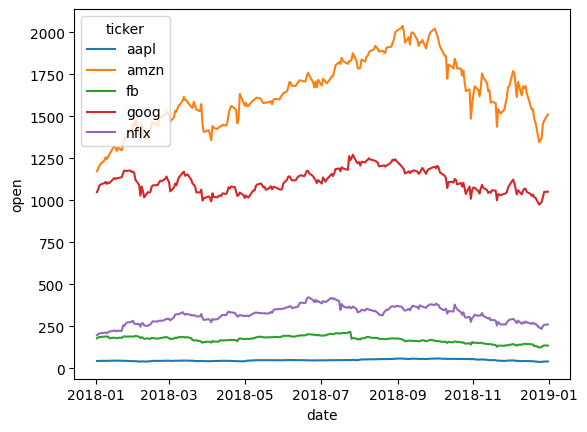

In [82]:
sns.lineplot(x=faang["date"], y=faang["open"], hue=faang["ticker"])

8. Grafica las 5 compañias y su valoración a apertura

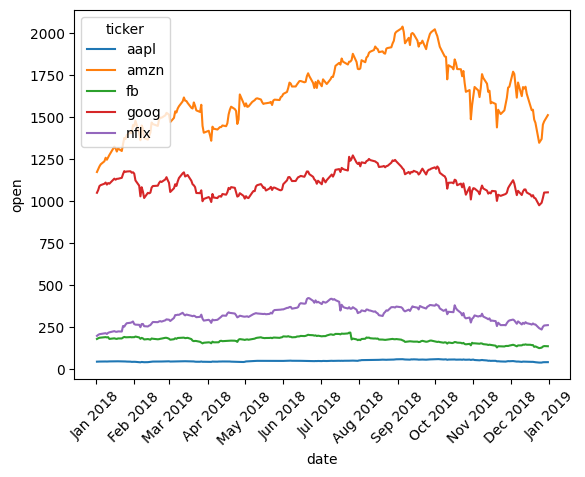

In [86]:
from matplotlib.dates import MonthLocator, DateFormatter
sns.lineplot(x=faang["date"], y=faang["open"], hue=faang["ticker"]);
plt.gca().xaxis.set_major_locator(MonthLocator());
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'));
plt.xticks(rotation=45);

9. Calcula la media de valoración a cierre de cada compañía. Haz una gráfica de barras con dicha información

<Axes: >

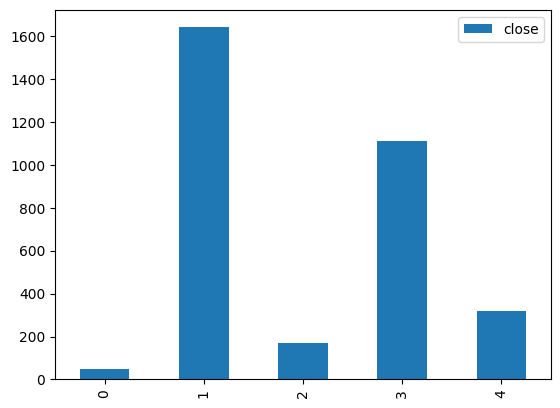

In [88]:
faang.groupby("ticker", as_index=False)["close"].mean().plot.bar()

In [90]:
medias = faang.groupby("ticker", as_index=False)["close"].mean()
plt.bar(medias["ticker"], medias["close"])

<BarContainer object of 5 artists>

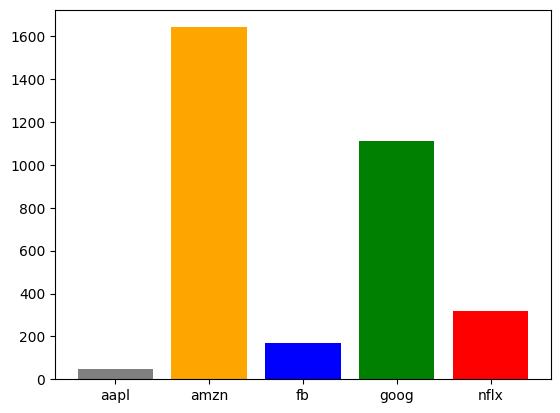

In [95]:
plt.bar(medias["ticker"], medias["close"], color=["grey", "orange", "blue", "green", "red"])

10. Calcula la media de valoración a cierre de cada compañía por cada mes. Haz una gráfica de barras con dicha información

In [97]:
faang.set_index("date", inplace=True)

In [121]:
medias_mes =pd.DataFrame(faang.groupby("ticker").resample("ME")["close"].mean())

In [104]:
medias_mes = medias_mes.reset_index()

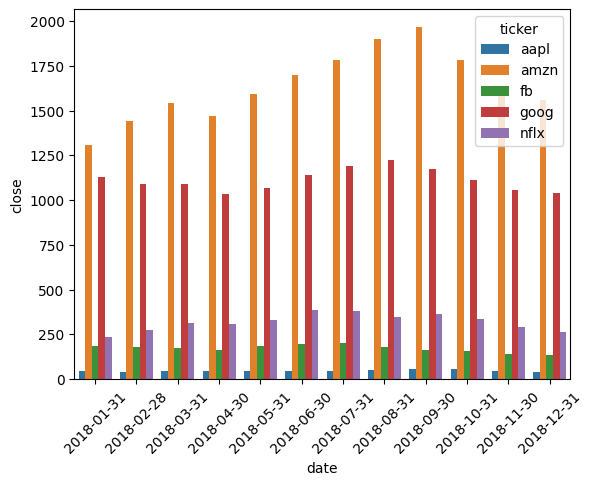

In [122]:
sns.barplot(data=medias_mes.reset_index(), x="date", y="close", hue="ticker")
plt.xticks(rotation=45);

11. Lee GOOG.csv

In [123]:
google = pd.read_csv("GOOG.csv")

In [127]:
google.head()
google["Date"] = pd.to_datetime(google["Date"])
google["Año"] = google["Date"].dt.year

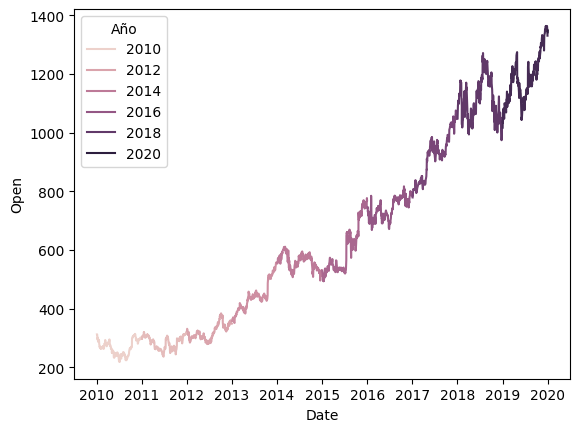

In [131]:
sns.lineplot(x=google["Date"], y=google["Open"], hue=google["Año"]);

12. Gráfica la cotización de google comparando su precio en el mismo día de cada año.
Es decir, el eje x serían los 365/6 días del año, el eje y la cotización de google.
Habría, pues, una línea por cada año de datos

13. Lee Pearson.txt

In [155]:
pearson = pd.read_csv("data/Pearson.txt", sep="\t")

14. Haz un gráfico con las medias de alturas de los padres e hijos

In [160]:
medias = pd.DataFrame(pearson.mean())
medias.columns = ["Altura"]

<Axes: >

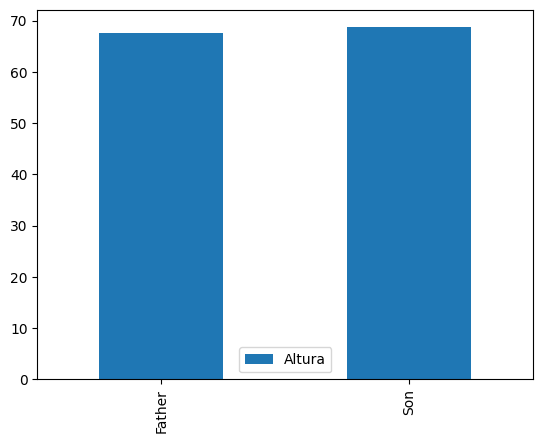

In [165]:
medias.plot.bar()

15. Haz una nube de puntes con las alturas de padres e hijos

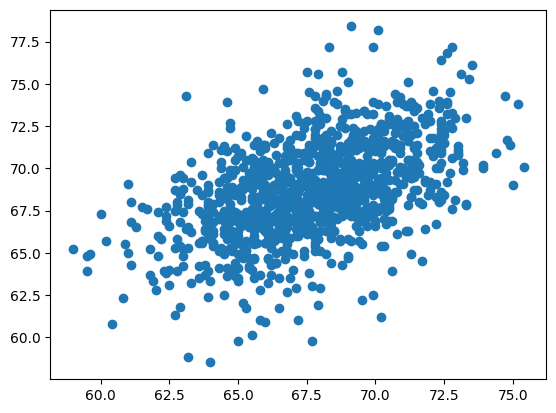

In [166]:
plt.scatter(pearson["Father"], pearson["Son"])

In [167]:
pearson.corr()

,Father,Son
Father,1.000000,0.501163
Son,0.501163,1.000000


16. Sobre el gráfico anterior pinta una recta de 45 grados. ¿Qué se observa?

(58.0, 78.0)

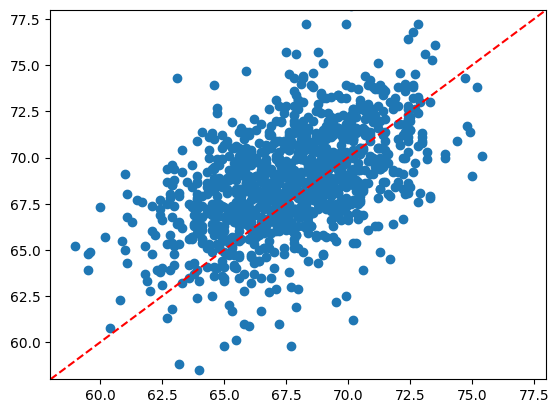

In [180]:
fig, ax = plt.subplots()
plt.scatter(pearson["Father"], pearson["Son"])
ax.axline([60,60], [75,75], color="r", linestyle="--")
plt.ylim(58,78)
plt.xlim(58,78)

17. Sobre el gráfico anterior pinta la recta de regresión. ¿Qué se observa?

(58.0, 78.0)

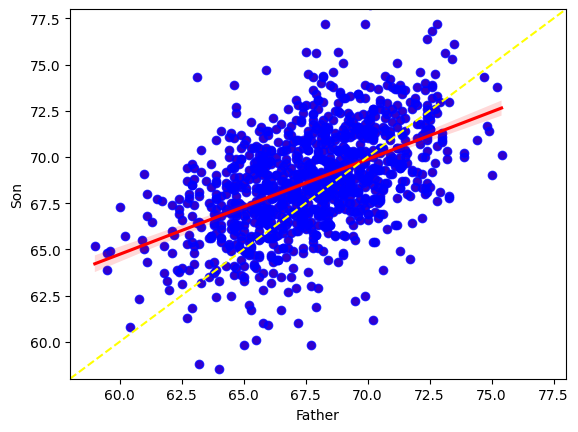

In [197]:
fig, ax = plt.subplots()
sns.scatterplot(x=pearson["Father"], y=pearson["Son"], color="red")
sns.regplot(x=pearson["Father"], y=pearson["Son"], scatter_kws={"color":"blue"}, line_kws={"color":"red"})
ax.axline([60,60], [75,75], color="yellow", linestyle="--")
plt.ylim(58,78)
plt.xlim(58,78)

In [187]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de